In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [50]:
a = pd.read_csv('d.csv')

In [61]:
cols = a.columns[1:]
d_train_Clean = a[cols]

In [62]:
# El dataset TRAIN con valores numéricos:
d_train_Clean

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,5,5,5,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,7,3,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,5,3,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,6,6,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,1,3,61.4,55.0,5.58,5.62,3.44,1276
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,0.50,4,6,5,61.9,56.0,5.09,5.12,3.16,1716
40341,40341,0.33,4,7,4,61.8,56.0,4.40,4.44,2.73,781
40342,40342,0.40,5,4,7,61.5,58.0,4.69,4.74,2.90,1123
40343,40343,1.06,4,2,5,61.2,57.0,6.59,6.56,4.03,5651


In [ ]:
# Normalizo el dataset:

In [68]:
# Random Forest Regressor:
rf_reg = RandomForestRegressor(n_estimators=240, max_depth=3, min_samples_leaf=3, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5)

In [69]:
# No uso columnas x, y, z:
Xcols = list(d_train_Clean.columns[1:7])
Xcols

['carat', 'cut', 'color', 'clarity', 'depth', 'table']

In [70]:
# Declaro X, y:
X = d_train_Clean[Xcols]
y = d_train_Clean['price']

In [273]:
# Split de dataset al 80%-20%:
result={}

# Random Forest Regressor con n_estimators optimizado en 240:
rf_reg = RandomForestRegressor(n_estimators=240, max_depth=14, min_samples_leaf=3, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5)

rango = [round(e,2) for e in np.arange (0.1, 0.3, 0.01)]
for i, e in enumerate(rango):
    # Split:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=e, random_state=17)
    
    # Entreno el modelo:
    model = rf_reg.fit(X_train, y_train)
    
    # Resultados del dataset TRAIN:
    train_score = (rf_reg.score(X_train, y_train))
    test_score = (rf_reg.score(X_test, y_test))
    rmse = np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test)))
    
    result[e]={'train_score':train_score,
              'test_score':test_score,
              'rmse':rmse}
    
    print (f'Processed {i+1} / {len(rango)}')

Processed 1 / 20
Processed 2 / 20
Processed 3 / 20
Processed 4 / 20
Processed 5 / 20
Processed 6 / 20
Processed 7 / 20
Processed 8 / 20
Processed 9 / 20
Processed 10 / 20
Processed 11 / 20
Processed 12 / 20
Processed 13 / 20
Processed 14 / 20
Processed 15 / 20
Processed 16 / 20
Processed 17 / 20
Processed 18 / 20
Processed 19 / 20
Processed 20 / 20


In [171]:
np.arange (0.1, 0.3, 0.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])

In [274]:
print(result)

{0.1: {'train_score': 0.990056740937768, 'test_score': 0.9821585854060576, 'rmse': 538.0362578878711}, 0.11: {'train_score': 0.9900605248942121, 'test_score': 0.9822601054816338, 'rmse': 534.8312293511848}, 0.12: {'train_score': 0.990070057127669, 'test_score': 0.9817455104755632, 'rmse': 541.8646081556699}, 0.13: {'train_score': 0.9900660371664036, 'test_score': 0.9820002204786424, 'rmse': 537.9872743784795}, 0.14: {'train_score': 0.9900829298770003, 'test_score': 0.9818496647241562, 'rmse': 535.5253567543932}, 0.15: {'train_score': 0.9901426501022376, 'test_score': 0.9814285353120094, 'rmse': 538.6970445637747}, 0.16: {'train_score': 0.990177576658885, 'test_score': 0.9807441502103944, 'rmse': 549.8831391151139}, 0.17: {'train_score': 0.9901786284079849, 'test_score': 0.980890122213356, 'rmse': 547.7318845189702}, 0.18: {'train_score': 0.9901841183001708, 'test_score': 0.9808553596546296, 'rmse': 550.4743593576196}, 0.19: {'train_score': 0.9900990516949295, 'test_score': 0.9811700123

In [275]:
tabla = pd.DataFrame(result)

In [276]:
tab = tabla.T
print(tab[tab.rmse==min(tab.rmse)])

      train_score  test_score        rmse
0.11     0.990061     0.98226  534.831229


In [222]:
import matplotlib.pyplot as plt

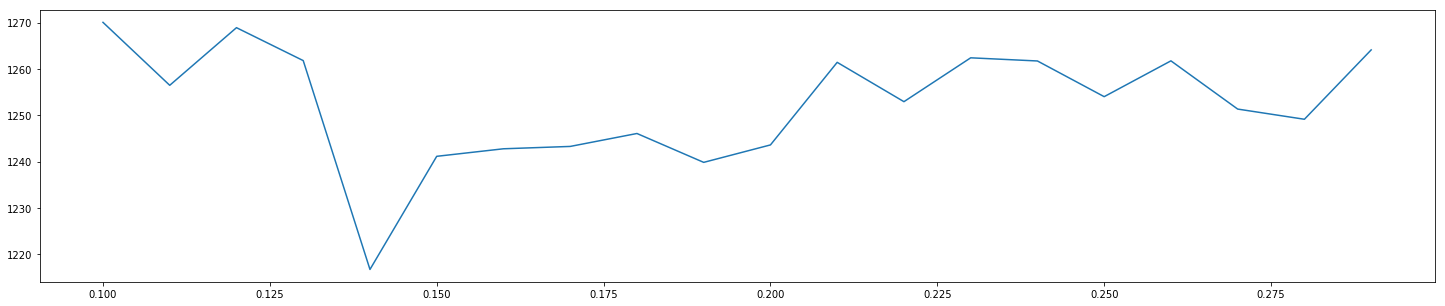

In [223]:
tab.rmse.plot(figsize=(25,5))

In [277]:
# Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=17)

# Entreno el modelo:
model = rf_reg.fit(X_train, y_train)

# Resultados del dataset TRAIN:
train_score = (rf_reg.score(X_train, y_train))
test_score = (rf_reg.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test)))

resultDef={'train_score':train_score,
          'test_score':test_score,
          'rmse':rmse}

In [278]:
resultDef

{'train_score': 0.9900605248942121,
 'test_score': 0.9822601054816338,
 'rmse': 534.8312293511848}

In [279]:
# Resultados del dataset TRAIN:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))

0.9900605248942121
0.9822601054816338
RMSE 534.8312293511848


In [ ]:
# Lo aplico a diamonds_test.csv:

In [281]:
df = pd.read_csv('diamonds_test.csv')
df.cut = df.cut.map(cuts)
df.color = df.color.map(colors)
df.clarity = df.clarity.map(clar)

In [282]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,5,3,2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,4,2,3,62.5,57.0,5.07,5.10,3.18
2,2,2.03,5,4,3,61.9,59.0,8.14,8.09,5.02
3,3,1.21,5,5,3,60.0,60.0,6.96,6.91,4.16
4,4,0.55,4,5,3,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,5,6,4,60.0,58.0,4.37,4.40,2.63
13445,13445,0.55,4,7,6,60.8,56.0,5.31,5.34,3.24
13446,13446,0.23,3,6,7,61.3,58.0,3.94,3.96,2.42
13447,13447,0.30,4,7,4,61.4,58.0,4.29,4.31,2.64


In [283]:
X_test = df[Xcols]

In [284]:
# Predicción de precio con los datos de diamonds_test.csv:
y_test_pred = model.predict(X_test)
y_test_pred

# Lo incluyo en el dataframe:
df['price']=y_test_pred

# Preparo df con las 2 columnas que quiero subir (id, price):
sub = df[['id', 'price']]

In [285]:
# Exporto archivo .csv:
sub.to_csv("sub6.csv", index=False)